# GROUP 19
Li Ming Long, Lay Wee Chong, Jemmy Wianta

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "A1result"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "groupAss1", CHAPTER_ID)
print(IMAGES_PATH)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


.\groupAss1\A1result


In [2]:
import pandas as pd
steel = pd.read_csv("Steel_industry_data.csv")
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

# split data into train and test sets using stratified Sampling

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split_ratio = 1/5 # 1 part test , 4 part train 
split = StratifiedShuffleSplit(
 n_splits=1,
 test_size=split_ratio,
 random_state=42
)

for train_index, test_index in split.split(steel,steel["Load_Type"]):
    train_set=steel.loc[train_index]
    test_set=steel.loc[test_index]

# Verify split resulted in representative sampling 

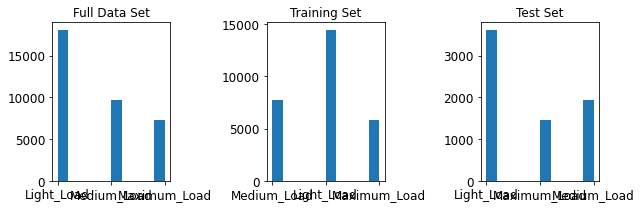

In [4]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (9, 3)
plt.subplot(1, 3, 1).set_title("Full Data Set")
plt.hist(steel["Load_Type"])
plt.subplot(1, 3, 2).set_title("Training Set")
plt.hist(train_set["Load_Type"])
plt.subplot(1, 3, 3).set_title("Test Set")
plt.hist(test_set["Load_Type"])
plt.tight_layout()
plt.show()

find interesting attribute correlations 

In [5]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [6]:
steel_cat=steel[['Load_Type']]
ordinal_encoder = OrdinalEncoder()
steel_cat_encoded = ordinal_encoder.fit_transform(steel_cat)
steel_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [7]:
ordinal_encoder.categories_

[array(['Light_Load', 'Maximum_Load', 'Medium_Load'], dtype=object)]

In [8]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
steel_cat_1hot = cat_encoder.fit_transform(steel_cat)
steel_cat_1hot

<35040x3 sparse matrix of type '<class 'numpy.float64'>'
	with 35040 stored elements in Compressed Sparse Row format>

In [9]:
steel_cat_1hot.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [10]:
cat_encoder.categories_

[array(['Light_Load', 'Maximum_Load', 'Medium_Load'], dtype=object)]

In [11]:
steel["Load_Type"] = pd.factorize(steel["Load_Type"])[0].astype(np.uint16)
corr_matrix=steel.corr()
corr_matrix["Usage_kWh"].sort_values(ascending=False)

Usage_kWh                               1.000000
CO2(tCO2)                               0.988180
Lagging_Current_Reactive.Power_kVarh    0.896150
Load_Type                               0.614570
Lagging_Current_Power_Factor            0.385960
Leading_Current_Power_Factor            0.353566
NSM                                     0.234610
Leading_Current_Reactive_Power_kVarh   -0.324922
Name: Usage_kWh, dtype: float64

In [12]:
corr_matrix["CO2(tCO2)"].sort_values(ascending=False)

CO2(tCO2)                               1.000000
Usage_kWh                               0.988180
Lagging_Current_Reactive.Power_kVarh    0.886948
Load_Type                               0.610653
Lagging_Current_Power_Factor            0.379605
Leading_Current_Power_Factor            0.360019
NSM                                     0.231726
Leading_Current_Reactive_Power_kVarh   -0.332777
Name: CO2(tCO2), dtype: float64

In [13]:
corr_matrix["Load_Type"].sort_values(ascending=False)

Load_Type                               1.000000
Usage_kWh                               0.614570
CO2(tCO2)                               0.610653
Lagging_Current_Power_Factor            0.519189
NSM                                     0.482767
Lagging_Current_Reactive.Power_kVarh    0.451899
Leading_Current_Power_Factor            0.075394
Leading_Current_Reactive_Power_kVarh    0.001776
Name: Load_Type, dtype: float64

In [14]:
corr_matrix["Lagging_Current_Reactive.Power_kVarh"].sort_values(ascending=False)

Lagging_Current_Reactive.Power_kVarh    1.000000
Usage_kWh                               0.896150
CO2(tCO2)                               0.886948
Load_Type                               0.451899
Leading_Current_Power_Factor            0.407716
Lagging_Current_Power_Factor            0.144534
NSM                                     0.082662
Leading_Current_Reactive_Power_kVarh   -0.405142
Name: Lagging_Current_Reactive.Power_kVarh, dtype: float64

we can find that Usage_kWh, CO2(tCO2),and Lagging_Current_Reactive.Power_kVarh, 
have very high relationship with the load_type(Steel_cat)

In [15]:
train_copy = train_set.copy()


In [16]:
train_copy['steelcor_avg']= (
     train_copy['Usage_kWh']+
     train_copy['CO2(tCO2)']+
     train_copy['Lagging_Current_Reactive.Power_kVarh'])/3
avg_steelcor_corr=train_copy.corr()['steelcor_avg'].sort_values(ascending=False)
avg_steelcor_corr.head(10)


steelcor_avg                            1.000000
Usage_kWh                               0.988758
CO2(tCO2)                               0.977617
Lagging_Current_Reactive.Power_kVarh    0.951770
Leading_Current_Power_Factor            0.380057
Lagging_Current_Power_Factor            0.314395
NSM                                     0.189260
Leading_Current_Reactive_Power_kVarh   -0.359228
Name: steelcor_avg, dtype: float64

In [17]:
avg_steelcor_corr.tail(10)

steelcor_avg                            1.000000
Usage_kWh                               0.988758
CO2(tCO2)                               0.977617
Lagging_Current_Reactive.Power_kVarh    0.951770
Leading_Current_Power_Factor            0.380057
Lagging_Current_Power_Factor            0.314395
NSM                                     0.189260
Leading_Current_Reactive_Power_kVarh   -0.359228
Name: steelcor_avg, dtype: float64

# Prepare Data for Machining Learning Algorithms

In [18]:
train_features = train_set.drop(['date','WeekStatus','Day_of_week','Load_Type'], axis=1)
train_labels = train_set.Load_Type

test_features = test_set.drop(['date','WeekStatus','Day_of_week','Load_Type'], axis=1)
test_labels = test_set.Load_Type

In [19]:
#check for missing values
if steel.isnull().values.any():
    print("there are missing values")
else:
    print("there is no missing")

    
# as no missing so did not need imputer 

there is no missing


# Create a pipeline to transform data before they are passed to models

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributeAdder(BaseEstimator, TransformerMixin):       
   steelcorr_cols = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)']
    
   def __init__(self, add_avg_steelcor=True):
        self.add_avg_steelcor = add_avg_steelcor
    
   def fit(self, steel, y=None):
        return self
    
   def transform(self, steel, y=None):
        steel_ = steel.copy()
        if self.add_avg_steelcor:
            steel_['steelcor_avg'] = steel_[self.__class__.steelcorr_cols].mean(axis=1)
        return steel_

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('attr_adder', AttributeAdder()),
    ('scaler', MinMaxScaler())
])

train_data = pipeline.fit_transform(train_features)
test_data = pipeline.fit_transform(test_features)

3 model

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def print_prediction_result(predicted_classes, actual_classes):
    print('confusion matrix:')
    print(confusion_matrix(actual_classes, predicted_classes))
    print()
    print('accuracy: ', accuracy_score(predicted_classes, actual_classes))

In [22]:
#make the train data to 2 part one for train one for test for the train
pre_train_data=train_data[:20000]
pre_train_labels=train_labels[:20000]
pre_test_data=train_data[20000:]
pre_test_labels=train_labels[20000:]

# Try DecisionTree Classifier 

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42)
dt.fit(pre_train_data, pre_train_labels)
prediction = dt.predict(pre_test_data)

print_prediction_result(prediction, pre_test_labels)

confusion matrix:
[[3919   55  193]
 [   7 1597   88]
 [ 173  752 1248]]

accuracy:  0.8421314741035857


In [24]:
# check for overfitting
prediction = dt.predict(pre_train_data)
print_prediction_result(prediction, pre_train_labels)

confusion matrix:
[[9731  116  443]
 [  13 3940  173]
 [ 388 2028 3168]]

accuracy:  0.84195


# RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=5, criterion='gini', random_state=42, n_jobs=-1)
rf.fit(pre_train_data, pre_train_labels)
prediction = rf.predict(pre_test_data)

print_prediction_result(prediction, pre_test_labels)

confusion matrix:
[[3965   11  191]
 [  66 1356  270]
 [ 293  577 1303]]

accuracy:  0.8247011952191236


In [26]:
# check for overfitting
prediction = rf.predict(pre_train_data)
print_prediction_result(prediction, pre_train_labels)

confusion matrix:
[[9841   37  412]
 [ 133 3289  704]
 [ 679 1553 3352]]

accuracy:  0.8241


# Naive Bayes Classifier

In [29]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(var_smoothing=20e-1)
gnb.fit(pre_train_data, pre_train_labels)
prediction = gnb.predict(pre_test_data)

print_prediction_result(prediction, pre_test_labels)

confusion matrix:
[[3836  176  155]
 [ 559 1095   38]
 [ 943  858  372]]

accuracy:  0.6602340637450199


In [30]:
# check for overfitting
prediction = gnb.predict(pre_train_data)
print_prediction_result(prediction, pre_train_labels)

confusion matrix:
[[9349  539  402]
 [1288 2723  115]
 [2343 2269  972]]

accuracy:  0.6522


# FINE-TUNE The Model  GridSearchCV use for RandomForestClassifier

In [31]:
from sklearn.model_selection import GridSearchCV

param_space = [
    {
        'n_estimators':[100, 300, 500],
        "criterion": ["gini", "entropy"],
        'max_depth': [5, 7],
        'max_features':['auto', 'sqrt']
    }
]

grid_search = GridSearchCV(
    RandomForestClassifier(),
    param_space,
    cv=3,
    n_jobs=-1
)
grid_search.fit(train_data,train_labels)

best_rf = grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 100}
0.8627996575342466


In [32]:
# check for overfitting
prediction = grid_search.predict(pre_train_data)
print_prediction_result(prediction, pre_train_labels)

confusion matrix:
[[9887   35  368]
 [  44 3347  735]
 [ 397 1007 4180]]

accuracy:  0.8707


# tunning decision tree

In [33]:
# tuning the Decision Tree model

# instantiate the DecisionTreeClassifier() model
dtc2 = DecisionTreeClassifier(random_state=42)

# set the hyperparameters for the gridsearchcv to choose the best one
dtc_param = { 
              "criterion": ["gini", "entropy"],
              "max_depth": [6, 9, 13],
              "min_samples_leaf": [1, 2, 3]
             }

# using gridsearchcv to get the best hyperparameter
dtc_gscv = GridSearchCV(estimator=dtc2, param_grid=dtc_param, cv=3, n_jobs=-1)

# fit the model with X_train and y_train
dtc_gscv.fit(train_data, train_labels)

# check the best performance of parameters
print(dtc_gscv.best_params_)

# print out the result
print(dtc_gscv.best_score_)

{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 3}
0.8861658105022832


In [34]:
# check for overfitting
prediction = dtc_gscv.predict(pre_train_data)
print_prediction_result(prediction, pre_train_labels)

confusion matrix:
[[10079    30   181]
 [   24  3499   603]
 [  291   681  4612]]

accuracy:  0.9095


# tunning naive bayes

In [35]:
# instantiate the GaussianNB() model
nbc2 = GaussianNB()

# set the hyperparameters for the gridsearchcv to choose the best one
# use var_smoothing as the hyperparameter
params = {'var_smoothing': np.logspace(0,-9, num=50)}

# using gridsearchcv to get the best hyperparameter
nbc2_gscv = GridSearchCV(estimator=nbc2, param_grid=params, cv=3, n_jobs=-1, scoring='accuracy') 

# fit the model with X_train and y_train
nbc2_gscv.fit(train_data, train_labels)

# check the best performance of parameters
print(nbc2_gscv.best_params_)

# print out the result
print(nbc2_gscv.best_score_)

{'var_smoothing': 0.0011513953993264468}
0.691138698630137


In [36]:
# check for overfitting
# using X_train to do predict and compare with X_test result
prediction = nbc2_gscv.predict(pre_train_data)

# check our models performance
print_prediction_result(prediction, pre_train_labels)

confusion matrix:
[[8324  781 1185]
 [ 341 3438  347]
 [ 869 2686 2029]]

accuracy:  0.68955


# Evaluation Random Forest Performance 

In [37]:
best_rf = RandomForestClassifier(
    n_estimators=60, 
    criterion='entropy',
    max_features=4
)

best_rf.fit(train_data, train_labels)
prediction = best_rf.predict(test_data)

print_prediction_result(prediction, test_labels)

confusion matrix:
[[3471    2  142]
 [  80 1168  206]
 [ 354  286 1299]]

accuracy:  0.8473173515981736


# Evaluation decision_tree

In [38]:
best_rf = DecisionTreeClassifier(
    criterion=  'entropy',
    max_depth= 18,
   min_samples_leaf= 18,
    random_state=42
)

best_rf.fit(train_data, train_labels)
prediction = best_rf.predict(test_data)

print_prediction_result(prediction, test_labels)

confusion matrix:
[[3350    2  263]
 [  60 1118  276]
 [ 244  259 1436]]

accuracy:  0.8424657534246576


# Evaluation naive bayes

In [39]:
best_rf = GaussianNB(
    var_smoothing= 0.0026826957952797246
)

best_rf.fit(train_data, train_labels)
prediction = best_rf.predict(test_data)

print_prediction_result(prediction, test_labels)

confusion matrix:
[[2954  175  486]
 [ 118 1190  146]
 [ 276  922  741]]

accuracy:  0.697060502283105
